# Projeto 3 - Marca D'água

Nesse projeto, vamos ver como podemos colocar uma marca d'água em uma imagem. Uma marca d'água funciona como um selo de direitos sobre sua imagem, ou seja, ninguém poderá usar sua imagem ou documento sem as devidas permissões. Utilizaremos OpenCV para esse processo.

Vamos começar importando as bibliotecas necessárias, como o OpenCV para o processamento de imagem e o Numpy para os cálculos.

In [10]:
# Importando bibliotecas importantes
import numpy as np
import requests
from PIL import Image
import cv2

Para este projeto, precisamos de uma URL de imagem na qual aplicaremos uma marca d'água. Vamos carregar a imagem usando a URL da imagem do Google Imagens. Você pode usar qualquer imagem que desejar e substituir a URL da imagem pela URL atual. Em seguida, iremos ler e redimensionar a imagem e, finalmente, armazená-la em duas variáveis para aplicar marcas d'água de logotipo e texto

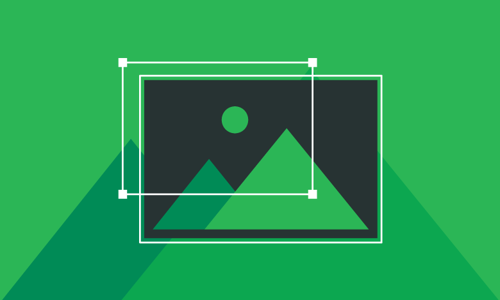

In [2]:
# Lendo a imagem pelo link
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

A logo que usaremos será a do site do AgentesDev, que está sendo baixada a partir do link acima.

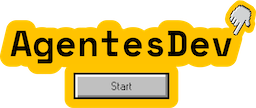

In [4]:
# Lendo imagem pela url
logo = Image.open(requests.get('https://www.agentesdev.com.br/_next/image?url=%2Fimages%2Flogo.png&w=256&q=75', stream=True).raw)
logo

Para usar essas imagens, primeiro iremos convertê-las para o formato RGB e armazená-las como uma matriz NumPy. Da mesma forma, também iremos extrair a forma da imagem, ou seja, sua altura e largura.

In [5]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

Vamos colocar nossa marca d'água no centro da imagem, para isso precisamos calcular o centro da imagem. Aqui, iremos determinar as coordenadas do centro da imagem usando a altura e a largura da imagem.

In [7]:
# Obtendo o centro da imagem original. É a localização onde iremos colocar a marca d'água
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

A Região de Interesse (ROI) é definida como a área onde precisamos colocar nossa marca d'água. Aqui, iremos determinar a ROI usando as coordenadas que encontramos anteriormente. Em seguida, usaremos o OpenCV para mesclar nosso logotipo na ROI. Da mesma forma, também adicionaremos uma linha ou um padrão à nossa imagem.

In [11]:
# Obtendo a ROI (Região de Interesse)
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Adicionar o logotipo à ROI
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Criando as linhas
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Substituir a ROI na imagem
image_logow[top_y: bottom_y, left_x: right_x] = result

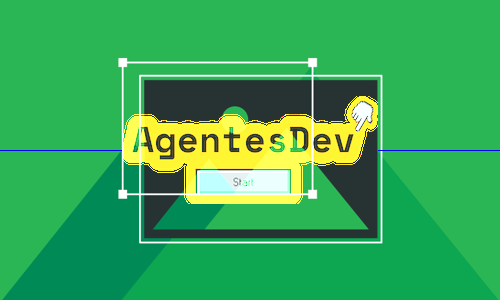

In [25]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

Agora iremos converter uma logo em texto para o formato RGB, converte-la para matriz e visualizá-la

In [30]:
# Marca d'água
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='AgentesDev', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,0), thickness=2, lineType=cv2.LINE_4);

image_text

array([[[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86],
        ...,
        [ 43, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       ...,

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 44, 183,  86],
        ...,
        [ 44, 182,  86],
        [ 43, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 42, 181,  86],
        ...,
        [ 29, 175,  83],
        [ 44, 182,  86],
        [ 43, 182,  86]],

       [[ 43, 182,  86],
        [ 43, 182,  86],
        [ 23, 162,  86],
        ...,
        [ 14, 168,  80],
        [ 36, 178,  85],
        [ 44, 182,  86]]

Em seguida, veremos como podemos usar um texto como marca d'água. Vamos converter nossa imagem em RGB e salvá-la como uma matriz NumPy. Para colocar um texto como marca d'água, iremos utilizar a função putText() do OpenCV. Aqui, podemos utilizar diferentes recursos, como tamanho do texto, espessura do texto, família da fonte, etc.

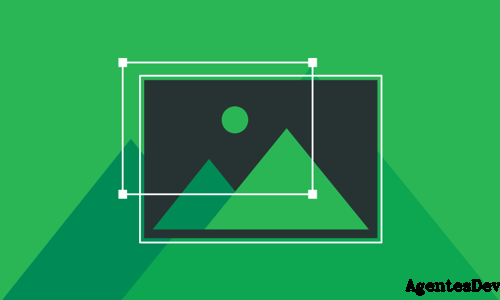

In [31]:
# Olhando a marca d'água na imagem
timg = Image.fromarray(image_text, 'RGB')
timg


Para visualizar a imagem, precisamos convertê-la de volta para o formato RGB

## Conclusion:


Adicionar uma marca d'água a uma imagem funciona como um direito autoral. Diferentes organizações podem usá-la para tornar seu conteúdo seguro, de modo que seu conteúdo não possa ser usado indevidamente sem sua licença ou uma versão paga. Neste projeto, vimos como podemos usar o OpenCV facilmente para adicionar marcas d'água às nossas imagens.